## Datensatz inkl. Ausreisser

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

In [15]:
df_camping_clean = pd.read_csv('camping_clean.csv', encoding='utf-8')


df_camping_analysis = df_camping_clean.drop(['Name', 'Ortschaft', 'Latitude', 'Longitude','Region', 'Golf', 'Disco','Region Nordwestschweiz', 'kleiner Platz (<80 m2)'], axis=1)

# Bearbeitete Daten als CSV speichern
df_camping_analysis.to_csv('df_camping_analysis.csv', encoding='utf-8', index=False)

## Datensatz exkl. Ausreisser
Aussreisser bei Preis und Campingplatzgrösse werden ausgeschlossen

In [7]:
df_camping_clean = pd.read_csv('camping_clean.csv', encoding='utf-8')

df_camping_analysis_no_outl = df_camping_clean.drop(['Name', 'Ortschaft', 'Latitude', 'Longitude','Region', 'Golf', 'Disco','Region Nordwestschweiz', 'kleiner Platz (<80 m2)'], axis=1)


In [10]:
from scipy import stats

def remove_outliers_iqr(data, column):
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 2 * IQR
    upper_bound = Q3 + 2 * IQR
    return data[(data[column] >= lower_bound) & (data[column] <= upper_bound)]

def remove_outliers_zscore(data, column, threshold=3):
    #Ein Z-Score-Schwellenwert von 3 bedeutet, dass Datenpunkte, die mehr als 3 Standardabweichungen vom Mittelwert entfernt sind, als Ausreisser betrachtet werden.
    z_scores = stats.zscore(data[column].dropna())
    abs_z_scores = abs(z_scores)
    filtered_entries = (abs_z_scores < threshold)
    return data[filtered_entries]

# Anwenden der IQR-Methode auf das Merkmal "Preis"
df_camping_analysis_no_outl = remove_outliers_iqr(df_camping_analysis_no_outl, 'Preis')
# Anwenden der IQR-Methode auf das Merkmal "Touristenplätze"
df_camping_analysis_no_outl = remove_outliers_iqr(df_camping_analysis_no_outl, 'Touristenstellplätze')


# Anwenden der Z-Score-Methode auf das Merkmal "Preis"
df_camping_analysis_no_outl = remove_outliers_zscore(df_camping_analysis_no_outl, 'Preis')
# Anwenden der Z-Score-Methode auf das Merkmal "Preis"
df_camping_analysis_no_outl = remove_outliers_zscore(df_camping_analysis_no_outl, 'Preis')



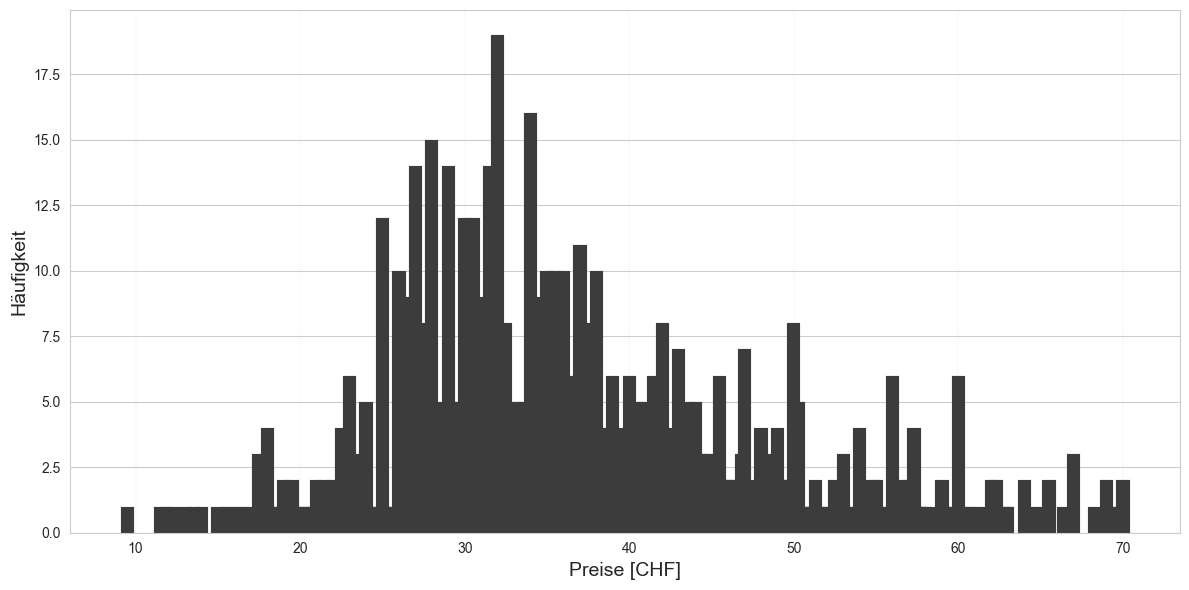

In [11]:
# Preise
value_counts = df_camping_analysis_no_outl['Preis'].value_counts().sort_index()

fig, ax = plt.subplots(figsize=(12, 6))

# Balken plotten
ax.bar(value_counts.index, value_counts.values, color='#3C3C3C', edgecolor='#3C3C3C', linewidth=0.1)

# Achsenbeschriftungen und Titel hinzufügen
ax.set_ylabel('Häufigkeit', fontsize=14)
ax.set_xlabel('Preise [CHF]', fontsize=14)

ax.grid(which='both', axis='x', linestyle='-', linewidth=0.1, color='lightgray')  # Nur horizontale Linien behalten

plt.tight_layout()
plt.show()

In [12]:
df_camping_analysis_no_outl['Preis'].describe()

count    774.000000
mean      36.935258
std       11.188506
min        9.500000
25%       29.000000
50%       34.800000
75%       43.500000
max       70.000000
Name: Preis, dtype: float64

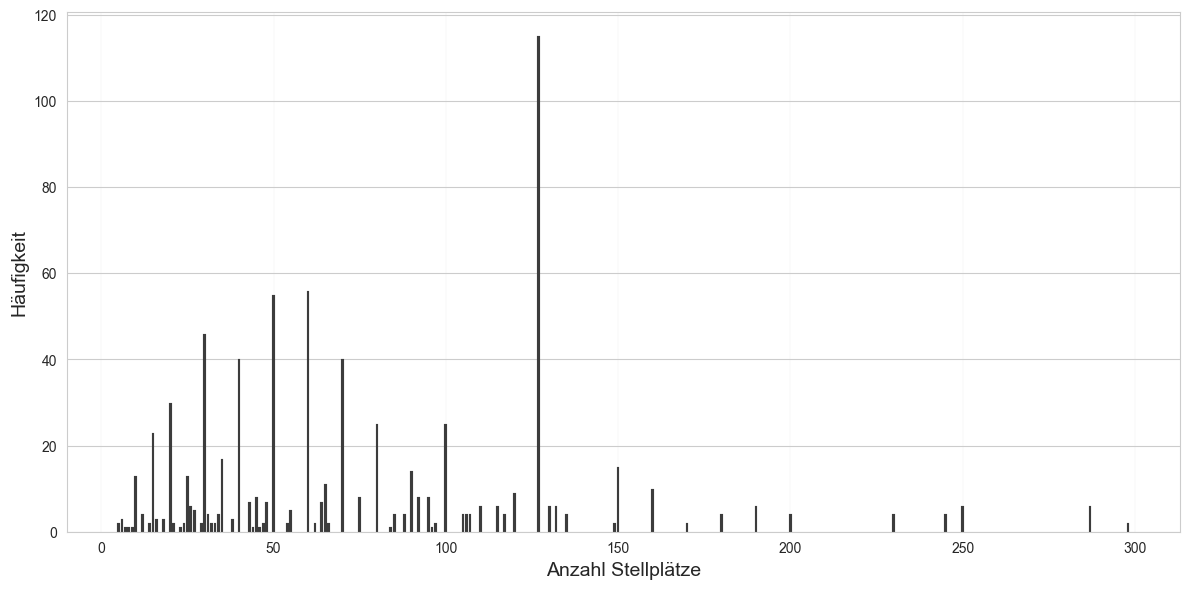

In [13]:
# Grösse des Campingplatzes (Touristenplätze)
value_counts = df_camping_analysis_no_outl['Touristenstellplätze'].value_counts().sort_index()

fig, ax = plt.subplots(figsize=(12, 6))

# Balken plotten
ax.bar(value_counts.index, value_counts.values, color='#3C3C3C', edgecolor='#3C3C3C', linewidth=0.1)

# Achsenbeschriftungen und Titel hinzufügen
ax.set_ylabel('Häufigkeit', fontsize=14)
ax.set_xlabel('Anzahl Stellplätze', fontsize=14)

ax.grid(which='both', axis='x', linestyle='-', linewidth=0.1, color='lightgray')  # Nur horizontale Linien behalten

plt.tight_layout()
plt.show()

In [14]:
df_camping_analysis_no_outl['Touristenstellplätze'].describe()

count    774.000000
mean      78.474160
std       53.690298
min        5.000000
25%       38.000000
50%       64.000000
75%      127.000000
max      298.000000
Name: Touristenstellplätze, dtype: float64

In [16]:
# Bearbeitete Daten als CSV speichern
df_camping_analysis_no_outl.to_csv('df_camping_analysis_no_outl.csv', encoding='utf-8', index=False)